# Deep Link Prediction

![image.png](./media/linkprediction1.png)

![image.png](./media/linkprediction2.png)

![image.png](./media/linkprediction3.png)

![image.png](./media/linkprediction4.png)

![image.png](./media/linkprediction5.png)

![image.png](./media/linkprediction6.png)

![image.png](./media/linkprediction7.png)

![image.png](./media/linkprediction8.png)

![image.png](./media/linkprediction9.png)

![image.png](./media/linkprediction10.png)

![image.png](./media/linkprediction11.png)

![image.png](./media/linkprediction12.png)

![image.png](./media/linkprediction13.png)

![image.png](./media/linkprediction14.png)

![image.png](./media/linkprediction15.png)

![image.png](./media/linkprediction16.png)

![image.png](./media/linkprediction17.png)

![image.png](./media/linkprediction18.png)

![image.png](./media/linkprediction19.png)

![image.png](./media/linkprediction20.png)

![image.png](./media/linkprediction21.png)

![image.png](./media/linkprediction22.png)

![image.png](./media/linkprediction24.png)

![image.png](./media/linkprediction26.png)

![image.png](./media/linkprediction27.png)

![image.png](./media/linkprediction28.png)

![image.png](./media/linkprediction29.png)

![image.png](./media/linkprediction30.png)

In [1]:
import csv 
import json
import string
import random
import typing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
import keras
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

2021-08-07 02:24:20.927078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-07 02:24:20.927110: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# python3 -m spacy download en_core_web_sm
english: spacy.lang.en.English = spacy.load("en_core_web_sm")
    
np.random.seed(5)

In [3]:
def random_string(size: int = 10) -> str:
    """
    Generates a random string.
    """
    chars: str = string.ascii_lowercase + "aeiou" * 30 + "rtsmpcnlgr" * 15
    return "".join([
        random.choice(chars)
        for _ in range(size)
    ])

assert isinstance(random_string(), str)
assert random_string() != random_string()
assert len(random_string(10)) == 10
assert len(random_string(20)) == 20

In [4]:
def random_integer(low: int = 0, high: int = 100) -> int:
    """
    Generates a random integer.
    """
    return random.randint(low, high)

assert isinstance(random_integer(), int)
assert random_integer() >= 0
assert random_integer() <= 100
assert random_integer(low=120, high=140) >= 120
assert random_integer(low=120, high=140) <= 140

In [5]:
def random_float(low: int = 0, high: int = 100) -> float:
    """
    Generates a random float number.
    """
    return random.uniform(low, high)

assert isinstance(random_float(), float)
assert random_float() >= 0
assert random_float() <= 100
assert random_float(low=120, high=140) <= 140
assert random_float(low=120, high=140) >= 120

In [6]:
def random_option(options: list) -> str:
    """
    Selects a value from a list randomly.
    """
    return random.choice(list(set(options)))

assert random_option([1, 2, 3]) in [1, 2, 3]

In [7]:
def random_probability() -> float:
    """
    Generates a random probability float number.
    """
    return random.uniform(0, 1)

assert isinstance(random_probability(), float)
assert random_probability() >= 0
assert random_probability() <= 1

In [8]:
def random_event(probability: float = 0.5) -> bool:
    """
    Generates a determines the occurrence of a random event.
    """
    assert probability >= 0
    assert probability <= 1
    return random_probability() < probability

assert isinstance(random_event(), bool)
assert random_event(probability=1) is True
assert random_event(probability=0) is False

In [9]:
def random_city() -> str:
    """
    Generates a random city name.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_city(), str)
assert random_city() != random_city()

In [10]:
def random_country() -> str:
    """
    Generates a random country.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_country(), str)
assert random_country() != random_country()

In [11]:
def random_industry() -> str:
    """
    Generates a random industry.
    """
    return random_string(10)

assert isinstance(random_industry(), str)
assert random_industry() != random_industry()

In [12]:
def random_state() -> str:
    """
    Generates a random state.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_state(), str)
assert random_state() != random_state()

In [13]:
def add_suffix(record: dict, suffix: str) -> dict:
    """
    Appends a suffix to all the keys of a given dictionary.
    """
    return {f"{k}#{suffix}": v for k, v in record.items()}

assert add_suffix({"a": "b"}, "1") == {"a#1": "b"}
assert add_suffix({"a": "b"}, "2") == {"a#2": "b"}

In [14]:
def word2vec(text: typing.Optional[str]) -> np.ndarray:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    if not isinstance(text, str) or text == "":
        return np.zeros(96)
    return english(text).vector

assert isinstance(word2vec("lorem"), np.ndarray)
assert np.array_equal(word2vec("lorem"), word2vec("lorem"))
assert word2vec("lorem").shape == (96, )
assert isinstance(word2vec(""), np.ndarray)
assert np.array_equal(word2vec(""), word2vec(""))
assert word2vec("").shape == (96, )

In [15]:
def similar_string(value: str, mutability: float = 0.2) -> str:
    """
    Generates a random string similar to a given string.
    """
    new_value: list = list(value)
    for i in range(len(new_value)):
        if random_event(mutability):
            new_value[i] = random_string(1)
    if new_value and random_event(mutability):
        new_value.pop(-1)
    if new_value and random_event(mutability):
        new_value.append(random_string(1))
    if not new_value and random_event(mutability):
        new_value: str = random_string(random_integer(4, 12))
    return "".join(new_value)

assert isinstance(similar_string("a", mutability=0.5), str)
assert similar_string("a", mutability=0.0) == "a"
assert similar_string("a", mutability=1.0) != "a"
assert similar_string("aaaaaa", mutability=1.0) != similar_string("aaaaaa", mutability=1)

In [16]:
def random_company(nulls: float = 0.1) -> dict:
    """
    Generates a random Company.
    """
    return {
        'city': '' if random_event(probability=nulls) else random_city(),
        'state': '' if random_event(probability=nulls) else random_state(),
        'country': '' if random_event(probability=nulls) else random_country(),
        'industry': '' if random_event(probability=nulls) else random_industry(),
        'employee_count': None if random_event(probability=nulls) else random_integer(1, 3000),
        'affiliations': random_integer(1, 5000),
        'popularity_score': random_probability(),
        'total_investmnets': None if random_event(probability=nulls) else random_integer(0, 4),
        'valuation': None if random_event(probability=nulls) else random_integer(50000, 500000),
        'average_investment_size': None if random_event(probability=nulls) else random_integer(10000, 100000),
    }


assert isinstance(random_company(), dict)
assert random_company() != random_company()

In [17]:
def random_person(nulls: float = 0.1) -> dict:
    """
    Generates a random Person.
    """
    return {
        'city': '' if random_event(probability=nulls) else random_city(),
        'state': '' if random_event(probability=nulls) else random_state(),
        'country': '' if random_event(probability=nulls) else random_country(),
        'industry': '' if random_event(probability=nulls) else random_industry(),
        'affiliations': random_integer(1, 3000),
        'popularity_score': random_probability(),
        'total_investmnets': None if random_event(probability=nulls) else random_integer(0, 4),
        'average_investment_size': None if random_event(probability=nulls) else random_integer(10000, 100000),
    }


assert isinstance(random_person(), dict)
assert random_person() != random_person()

In [18]:
def random_relationships(nulls: float = 0.1) -> dict:
    """
    Generates a random Affiliation.
    """
    return {
        'introduction_path_length': random_integer(1, 6),
        'introduction_path_score': random_probability(),
        'mutual_connections': random_integer(0, 100),
    }


assert isinstance(random_relationships(), dict)
assert random_relationships() != random_relationships()

In [19]:
def random_person_company_link(
    nulls: float = 0.1,
    connected: bool = False,
    mutability: float = 0.01,
    target: str = 'connected',
) -> dict:
    """
    Generates a random dictionary representation of the affiliation
    of a Person and a Company.
    """
    company: dict = random_company(nulls=nulls)
    person: dict = random_person(nulls=nulls)
    relationship: dict = random_relationships(nulls=nulls)
    if connected:
        if random_event(probability=0.01):
            # Same country.
            person['country'] = similar_string(company['country'], mutability=mutability)
        elif random_event(probability=0.1):
            # Same state.
            person['state'] = similar_string(company['state'], mutability=mutability)
            person['country'] = similar_string(company['country'], mutability=mutability)
        elif random_event(probability=0.4):
            # Same city.
            person['city'] = similar_string(company['city'], mutability=mutability)
            person['state'] = similar_string(company['state'], mutability=mutability)
            person['country'] = similar_string(company['country'], mutability=mutability)
        if random_event(probability=0.3):
            # Same industry.
            person['industry'] = similar_string(company['industry'], mutability=mutability)
        if random_event(probability=0.3):
            # Very large Company.
            company['employee_count'] = random_integer(3000, 10000)
        if random_event(probability=0.3):
            # Very big Company.
            company['valuation'] = random_integer(1000000, 1000000000)
        if random_event(probability=0.3):
            # Large investments received.
            company['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Large investments made.
            person['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Highly connected Company.
            company['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Highly connected Person.
            person['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Popular Person.
            person['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Popular Company.
            company['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.7):
            # Highly connected nodes.
            relationship['introduction_path_length'] = random_integer(1, 2)
        if random_event(probability=0.7):
            # High score path.
            relationship['introduction_path_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.7):
            # Lots of mutual connections.
            relationship['mutual_connections'] = random_integer(300, 1000)
    else:
        relationship['introduction_path_length'] = random_integer(4, 6)
        relationship['introduction_path_score'] = random_float(0.0, 0.2)
        relationship['mutual_connections'] = random_integer(0, 10)
    return {
        **add_suffix(person, "person"),
        **add_suffix(company, "company"),
        **add_suffix(relationship, "relationship"),
        target: 1 if connected else 0,
    }   


assert isinstance(random_person_company_link(), dict)
assert isinstance(random_person_company_link(connected=True), dict)
assert isinstance(random_person_company_link(connected=False), dict)
assert random_person_company_link() != random_person_company_link()

In [20]:
def random_person_person_link(
    nulls: float = 0.1,
    connected: bool = False,
    mutability: float = 0.01,
    target: str = 'connected',
) -> dict:
    """
    Generates a random dictionary representation of the affiliation
    of a Person and a Company.
    """
    other: dict = random_person(nulls=nulls)
    person: dict = random_person(nulls=nulls)
    relationship: dict = random_relationships(nulls=nulls)
    if connected:
        if random_event(probability=0.01):
            # Same country.
            person['country'] = similar_string(other['country'], mutability=mutability)
        elif random_event(probability=0.1):
            # Same state.
            person['state'] = similar_string(other['state'], mutability=mutability)
            person['country'] = similar_string(other['country'], mutability=mutability)
        elif random_event(probability=0.4):
            # Same city.
            person['city'] = similar_string(other['city'], mutability=mutability)
            person['state'] = similar_string(other['state'], mutability=mutability)
            person['country'] = similar_string(other['country'], mutability=mutability)
        if random_event(probability=0.3):
            # Same industry.
            person['industry'] = similar_string(other['industry'], mutability=mutability)
        if random_event(probability=0.3):
            # Large investments received.
            other['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Large investments made.
            person['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Highly connected Person.
            other['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Highly connected Person.
            person['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Popular Person.
            person['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Popular Person.
            other['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.7):
            # Highly connected nodes.
            relationship['introduction_path_length'] = random_integer(1, 2)
        if random_event(probability=0.7):
            # High score path.
            relationship['introduction_path_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.7):
            # Lots of mutual connections.
            relationship['mutual_connections'] = random_integer(300, 1000)
    else:
        relationship['introduction_path_length'] = random_integer(4, 6)
        relationship['introduction_path_score'] = random_float(0.0, 0.2)
        relationship['mutual_connections'] = random_integer(0, 10)
    return {
        **add_suffix(person, "1"),
        **add_suffix(other, "2"),
        **add_suffix(relationship, "relationship"),
        target: 1 if connected else 0,
    }   


assert isinstance(random_person_person_link(), dict)
assert isinstance(random_person_person_link(connected=True), dict)
assert isinstance(random_person_person_link(connected=False), dict)
assert random_person_person_link() != random_person_person_link()

Links: (1, 22)
Links: (1, 22)
Links: (1, 22)
Links: (1, 22)
Links: (2, 22)


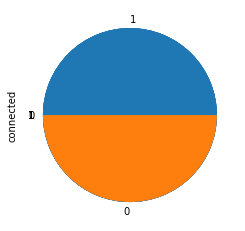

In [21]:
def generate_random_investments_dataset(
    total: int = 1000,
    target: str = 'connected',
    connections: float = 0.5,
    nulls: float = 0.01,
    mutability: float = 0.01,
    feedback: list = None,
    relevance: int = 10,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total relationships between Persons and Companies.
    """
    raw_links_list: typing.List[dict] = [
        random_person_company_link(
            nulls=nulls,
            connected=random_event(probability=connections),
            mutability=mutability,
            target=target,
        )
        for _ in range(total)
    ]
    if feedback is not None:
        for case in feedback:
            raw_links_list.extend([case] * relevance)
    raw_links_dataframe: pd.DataFrame = pd.DataFrame(raw_links_list)
    raw_links_dataframe[target] = raw_links_dataframe[target].astype(int)
    print("Links:", raw_links_dataframe.shape)
    raw_links_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_links_dataframe

assert isinstance(generate_random_investments_dataset(total=1), pd.DataFrame)
assert not generate_random_investments_dataset(total=1).equals(generate_random_investments_dataset(total=1))
assert generate_random_investments_dataset(total=1).shape == (1, 22)
assert generate_random_investments_dataset(total=2).shape == (2, 22)

Links: (1, 20)
Links: (1, 20)
Links: (1, 20)
Links: (1, 20)
Links: (2, 20)


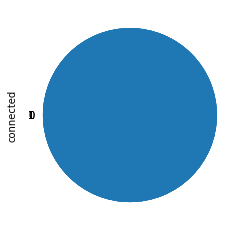

In [22]:
def generate_random_contacts_dataset(
    total: int = 1000,
    target: str = 'connected',
    connections: float = 0.5,
    nulls: float = 0.01,
    mutability: float = 0.01,
    feedback: list = None,
    relevance: int = 10,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total relationships between Persons.
    """
    raw_links_list: typing.List[dict] = [
        random_person_person_link(
            nulls=nulls,
            connected=random_event(probability=connections),
            mutability=mutability,
            target=target,
        )
        for _ in range(total)
    ]
    if feedback is not None:
        for case in feedback:
            raw_links_list.extend([case] * relevance)
    raw_links_dataframe: pd.DataFrame = pd.DataFrame(raw_links_list)
    raw_links_dataframe[target] = raw_links_dataframe[target].astype(int)
    print("Links:", raw_links_dataframe.shape)
    raw_links_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_links_dataframe

assert isinstance(generate_random_contacts_dataset(total=1), pd.DataFrame)
assert not generate_random_contacts_dataset(total=1).equals(generate_random_contacts_dataset(total=1))
assert generate_random_contacts_dataset(total=1).shape == (1, 20)
assert generate_random_contacts_dataset(total=2).shape == (2, 20)

In [23]:
def fix_nulls(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fixes the null values of a given DataFrame.
    """
    columns: pd.Index = df.select_dtypes(include=['number']).columns
    df[columns] = df[columns].fillna(0)
    columns: pd.Index = df.select_dtypes(include=['object']).columns
    df[columns] = df[columns].fillna('')
    return df

df: pd.DataFrame = pd.DataFrame({"a": [0, None, 2], "b": ["b", None, "b"], "c": [0.0, None, 1.0]})
df[df.isna()].count()['a'] == 1
df[df.isna()].count()['b'] == 1
df[df.isna()].count()['c'] == 1
df: pd.DataFrame = fix_nulls(df)
df[df.isna()].count()['a'] == 0
df[df.isna()].count()['b'] == 0
df[df.isna()].count()['c'] == 0

True

In [71]:
def df2vec(df: pd.DataFrame, target: str = 'connected') -> pd.DataFrame:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    numeric: pd.Index = df.select_dtypes(include=['number']).columns
    vectorized_dataset: pd.DataFrame = df.copy()  
    for feature in vectorized_dataset.columns:
        if feature != target and feature not in numeric:
            print("Vectorizing:", feature)
            vectorized_dataset[feature] = vectorized_dataset[feature].apply(word2vec).apply(np.array)
    return vectorized_dataset

assert isinstance(df2vec(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
)['a'][0], np.ndarray)
assert isinstance(df2vec(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
)['a'][1], np.ndarray)
assert df2vec(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
).shape == (2, 2)
assert df2vec(
    pd.DataFrame({"a": [2, 1], "t": [0, 1]}), target="t",
).shape == (2, 2)

Vectorizing: a
Vectorizing: a
Vectorizing: a


In [25]:
def vec2matrix(data: pd.DataFrame) -> np.ndarray:
    """
    Transforms a Pandas DataFrame into a Numpy 3D Array.
    """
    features: typing.List[np.ndarray] = []
    for feature in data.columns:
        features.append(np.array(data[feature].to_list()))
    matrix: np.array = np.array(features)
    matrix: np.array = np.swapaxes(matrix, 0, 1)
    return matrix

array: np.ndarray = np.zeros((3, ))
dataframe: pd.DataFrame = pd.DataFrame({"a": [array, array]})
assert vec2matrix(dataframe).shape == (2, 1, 3)

In [26]:
def get_numerical(df: pd.DataFrame, target: str = 'connected') -> pd.DataFrame:
    """
    Extracts numerical features from a DataFrame.
    """
    numerical: pd.Index = [
        column
        for column in df.select_dtypes(include=['number']).columns
        if column != target
    ]
    print("Numerical Features:", numerical)
    return df[numerical]

df: pd.DataFrame = pd.DataFrame({"a": [1, 2, 3], "b": ["c", "d", "e"]})
df: pd.DataFrame = get_numerical(df)
assert df['a'].all()

Numerical Features: ['a']


In [27]:
def get_categorical(df: pd.DataFrame, target: str = 'connected') -> pd.DataFrame:
    """
    Extracts categorical features from a DataFrame.
    """
    numerical: pd.Index = [
        column
        for column in df.select_dtypes(include=['number']).columns
        if column != target
    ]
    categorical: pd.Index = [
        column
        for column in df.columns
        if column not in numerical
        and column != target
    ]
    print("Categorical Features:", categorical)
    return df[categorical]

df: pd.DataFrame = pd.DataFrame({"a": [1, 2, 3], "b": ["c", "d", "e"]})
df: pd.DataFrame = get_categorical(df)
assert df['b'].all()

Categorical Features: ['b']


Numerical Features: ['n']
Categorical Features: ['c']
Predicted: m
Xn (20, 1)
Xc (20, 1)
Y (20,)
Train (12, 1) (12, 1) (12,)
Test (4, 1) (4, 1) (4,)
Val (4, 1) (4, 1) (4,)
Train (12, 1) (12, 1, 3) (12,)
Test (4, 1) (4, 1, 3) (4,)
Val (4, 1) (4, 1, 3) (4,)
Links: [6, 2, 2] [12, 4, 4]


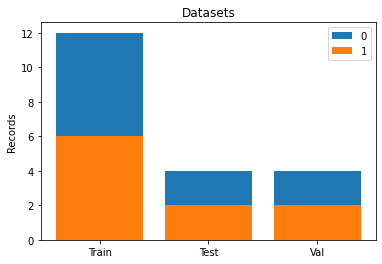

In [28]:
def split_dataframe(
    dataset: pd.DataFrame,
    target: str = 'connected',
    test_size: float = 0.2,
    val_size: float = 0.2,
    random_state: int = 5,
) -> typing.Tuple[np.ndarray]:
    """
    Splits a dataset into Train, Test and Validation.
    """
    xn: pd.DataFrame = get_numerical(dataset, target=target)
    xc: pd.DataFrame = get_categorical(dataset, target=target)
    y: pd.DataFrame = dataset[target]
    assert xn.shape[0] == y.shape[0]
    assert xc.shape[0] == y.shape[0]
    print("Predicted:", target)

    print("Xn", xn.shape)
    print("Xc", xc.shape)
    print("Y", y.shape)

    xn_train, xn_test, xc_train, xc_test, y_train, y_test = train_test_split(
        xn,
        xc,
        y,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
        stratify=y,
    )

    xn_train, xn_val, xc_train, xc_val, y_train, y_val = train_test_split(
        xn_train,
        xc_train,
        y_train,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
        stratify=y_train,
    )

    print("Train", xn_train.shape, xc_train.shape, y_train.shape)
    print("Test", xn_test.shape, xc_test.shape, y_test.shape)
    print("Val", xn_val.shape, xc_val.shape, y_val.shape)

    assert xn_train.shape[0] == y_train.shape[0]
    assert xn_test.shape[0] == y_test.shape[0]
    assert xn_val.shape[0] == y_val.shape[0]

    assert xc_train.shape[0] == y_train.shape[0]
    assert xc_test.shape[0] == y_test.shape[0]
    assert xc_val.shape[0] == y_val.shape[0]

    assert xn_train.shape[1] == xn_test.shape[1]
    assert xn_train.shape[1] == xn_val.shape[1]
    assert xn_test.shape[1] == xn_val.shape[1]

    assert xc_train.shape[1] == xc_test.shape[1]
    assert xc_train.shape[1] == xc_val.shape[1]
    assert xc_test.shape[1] == xc_val.shape[1]
    assert xn_train.shape[0] + xn_test.shape[0] + xn_val.shape[0] == xn.shape[0]
    assert xc_train.shape[0] + xc_test.shape[0] + xc_val.shape[0] == xc.shape[0]
    assert y_train.shape[0] + y_test.shape[0] + y_val.shape[0] == y.shape[0]

    xn_train: np.ndarray = xn_train.values
    xn_test: np.ndarray = xn_test.values
    xn_val: np.ndarray = xn_val.values

    y_train: np.ndarray = y_train.values
    y_test: np.ndarray = y_test.values
    y_val: np.ndarray = y_val.values

    xc_train: typing.List[np.array] = vec2matrix(xc_train)
    xc_test: typing.List[np.array] = vec2matrix(xc_test)
    xc_val: typing.List[np.array] = vec2matrix(xc_val)

    print("Train", xn_train.shape, xc_train.shape, y_train.shape)
    print("Test", xn_test.shape, xc_test.shape, y_test.shape)
    print("Val", xn_val.shape, xc_val.shape, y_val.shape)

    matches: list = [
        sum(y_train == 1),
        sum(y_test == 1),
        sum(y_val == 1),   
    ]
    missmatches: list = [
        y_train.shape[0],
        y_test.shape[0],
        y_val.shape[0],   
    ]
    print("Links:", matches, missmatches)
    assert matches != missmatches, "Too many links!"
    assert all(matches), "Not enough links!"
    assert all(missmatches), "Not enough missing links!"
    labels: list = ['Train', 'Test', 'Val']
    fig, ax = plt.subplots()
    ax.bar(labels, missmatches, label='0')
    ax.bar(labels, matches, label='1')
    ax.set_ylabel('Records')
    ax.set_title('Datasets')
    ax.legend()
    plt.show()

    return xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val
    
xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val = split_dataframe(
    dataset=pd.DataFrame({
        "c": [np.array([1, 2, 3])] * 20,
        "n": [1] * 20,
        "m": [1, 0] * 10
    }),
    target='m',
    test_size=0.2,
    val_size=0.2,
)
assert xn_train.shape == (12, 1)
assert xc_train.shape == (12, 1, 3)
assert y_train.shape == (12, )
assert xn_test.shape == (4, 1)
assert xc_test.shape == (4, 1, 3)
assert y_test.shape == (4, )
assert xn_val.shape == (4, 1)
assert xc_val.shape == (4, 1, 3)
assert y_val.shape == (4, )
assert isinstance(xc_train, np.ndarray)
assert isinstance(xn_train, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(xc_test, np.ndarray)
assert isinstance(xn_test, np.ndarray)
assert isinstance(y_test, np.ndarray)
assert isinstance(xc_val, np.ndarray)
assert isinstance(xn_val, np.ndarray)
assert isinstance(y_val, np.ndarray)

Input: (3, 4) (3, 2, 2)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 2, 2)]       0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 4)            0           input_26[0][0]                   
__________________________________________________________________________________________________
concatenate_12 (Concatenate)    (None, 8)            0           input_25[0][0]                   
                                                                 fla

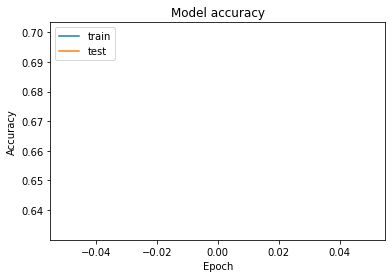

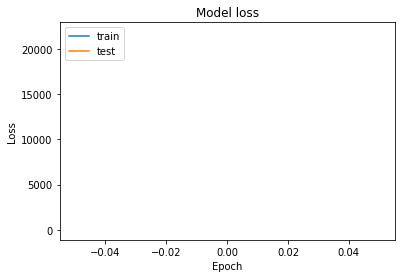

1/1 [==============================] - 0s 182ms/step - loss: 21830.2871 - binary_accuracy: 0.6667
Metrics: 21830.287109375 0.6666666865348816


In [82]:
def train_link_prediction(
    xn_train: np.ndarray,
    xc_train: np.ndarray,
    y_train: np.ndarray,
    xn_test: np.ndarray,
    xc_test: np.ndarray,
    y_test: np.ndarray,
    xn_val: np.ndarray,
    xc_val: np.ndarray,
    y_val: np.ndarray,
    learning_rate: float = 0.0001,
    batch_size: int = 30,
    epochs: int = 1,
    dropout: float = 0.01,
) -> typing.Tuple[keras.models.Model, float, float]:
    """
    Trains a classifier to predict links.
    """
    print("Input:", xn_train.shape, xc_train.shape)

    numerical_input_layer: keras.layers.Input = keras.layers.Input(shape=(xn_train.shape[1], ))

    categorical_input_layer: keras.layers.Input = keras.layers.Input(shape=(xc_train.shape[1], xc_train.shape[2]))
    flatten: keras.layers.Flatten = keras.layers.Flatten()(categorical_input_layer)

    merge_layer: keras.layers.Concatenate = keras.layers.Concatenate()([numerical_input_layer, flatten])

    dense1: keras.layers.Dense = keras.layers.Dense(4096, activation='relu')(merge_layer)
    dropout1: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense1)

    dense2: keras.layers.Dense = keras.layers.Dense(2048, activation='relu')(dropout1)
    dropout2: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense2)

    dense3: keras.layers.Dense = keras.layers.Dense(1024, activation='relu')(dropout2)
    dropout3: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense3)

    dense4: keras.layers.Dense = keras.layers.Dense(514, activation='relu')(dropout3)
    dropout4: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense4)
    
    dense5: keras.layers.Dense = keras.layers.Dense(256, activation='relu')(dropout4)
    dropout5: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense5)

    dense6: keras.layers.Dense = keras.layers.Dense(128, activation='relu')(dropout5)
    dropout6: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense6)

    out: keras.layers.Dense = keras.layers.Dense(1, activation='sigmoid')(dropout6)

    model: keras.Model = keras.Model(inputs=[numerical_input_layer, categorical_input_layer], outputs=out)

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.BinaryAccuracy()
        ],
    )

    print(model.summary())

    history: keras.callbacks.History = model.fit(
        [xn_train, xc_train],
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=([xn_test, xc_test], y_test),
        callbacks=[
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
        ]
    )

    print(history.history)

    # Summarize history of accuracy.
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss.
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    loss, accuracy = model.evaluate([xn_val, xc_val], y_val, batch_size=128)
    print("Metrics:", loss, accuracy)

    return model, loss, accuracy


xc: np.array = np.array([[[0, 1], [0, 1]], [[0, 1], [0, 1]], [[0, 1], [0, 1]]])
xn: np.array = np.array([[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]])
y: np.array = np.array([0, 1, 1])
sample_model, sample_loss, sample_accuracy = train_link_prediction(
    xn_train=xn,
    xc_train=xc,
    y_train=y,
    xn_test=xn,
    xc_test=xc,
    y_test=y,
    xn_val=xn,
    xc_val=xc,
    y_val=y,
    epochs=1,
    learning_rate=0.01,
    batch_size=50,
)
assert isinstance(sample_model, keras.models.Model)
assert isinstance(sample_loss, float)
assert isinstance(sample_accuracy, float)

/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       3.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



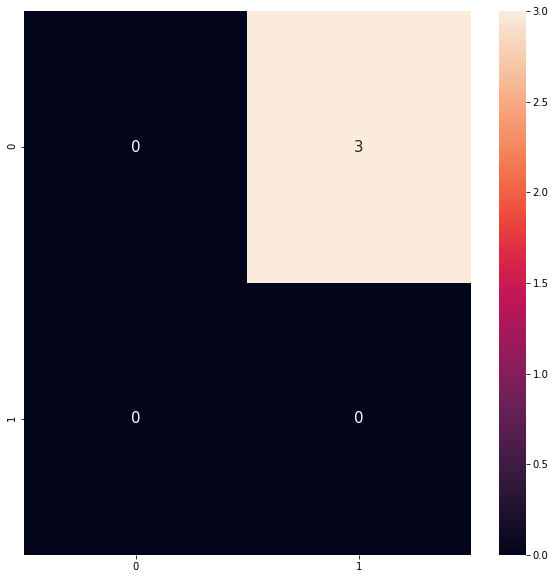

In [83]:
def error_analysis(
    model: keras.models.Model,
    xn_test: np.array,
    xc_test: np.array,
    y_test: np.array,
    confidence: float
) -> None:
    """
    Performs error analysis on a prediction model.
    """
    y_pred: np.ndarray = np.array(model.predict((xn_test, xc_test)))
    matrix = confusion_matrix(y_test > confidence, y_pred > confidence)
    print(classification_report(y_test > confidence, y_pred > confidence))
    cm = confusion_matrix(y_test > confidence, y_pred > confidence)
    cm = pd.DataFrame(cm, range(2),range(2))
    plt.figure(figsize = (10,10))
    sns.heatmap(cm, annot=True, annot_kws={"size": 15})
    plt.show()
    
assert error_analysis(
    model=sample_model,
    confidence=0.3,
    xn_test=np.zeros((3, 4)),
    xc_test=np.zeros((3, 2, 2)),
    y_test=np.zeros((3, ))
) is None

In [84]:
 def predict_link_model(
    model: keras.models.Model,
    records: typing.Union[np.ndarray, list],
    confidence: typing.Optional = None,
 ) -> np.ndarray:
    """
    Uses a trained model to predict links.
    """
    if isinstance(records, list):
        df: pd.DataFrame = pd.DataFrame(data=records, columns=records[0].keys())
        df: pd.DataFrame = fix_nulls(df)
        df: pd.DataFrame = df2vec(df)
        xn_pred: np.array = get_numerical(df).values
        xc_pred: np.array = vec2matrix(get_categorical(df))
        records: list = [xn_pred, xc_pred]
    assert len(records) == 2
    print("Input:", records[0].shape, records[1].shape)
    y_pred: list = model.predict(records)
    print("Predictions:", y_pred)
    if confidence is not None:
        y_pred = y_pred >= confidence
        print("Confidence:", y_pred)
    return y_pred

assert predict_link_model(model=sample_model, records=(np.zeros((1, 4)), np.zeros((1, 2, 2)))).shape == (1, 1)
assert predict_link_model(model=sample_model, records=(np.zeros((2, 4)), np.zeros((2, 2, 2)))).shape == (2, 1)
assert predict_link_model(model=sample_model, records=(np.zeros((3, 4)), np.zeros((3, 2, 2)))).shape == (3, 1)
assert predict_link_model(model=sample_model, records=(np.zeros((1, 4)), np.zeros((1, 2, 2))), confidence=0)[0][0]

Input: (1, 4) (1, 2, 2)
Predictions: [[1.]]
Input: (2, 4) (2, 2, 2)
Predictions: [[1.]
 [1.]]
Input: (3, 4) (3, 2, 2)
Predictions: [[1.]
 [1.]
 [1.]]
Input: (1, 4) (1, 2, 2)
Predictions: [[1.]]
Confidence: [[ True]]


# Investment Prediction

Links: (11000, 22)


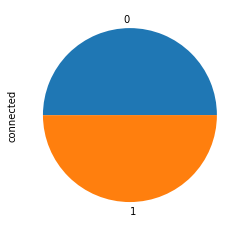

In [85]:
raw_investments_dataframe: pd.DataFrame = generate_random_investments_dataset(
    total=10000,
    connections=0.5,
    nulls=0.01,
    mutability=0.01,
    relevance=500,
    feedback=[
        {
            'city#company': 'San Francisco',
            'state#company': 'California',
            'country#company': 'US',
            'industry#company': 'health',
            'employee_count#company': 100,
            'affiliations#company': 3000,
            'popularity_score#company': 0.9,
            'total_investmnets#company': 12,
            'valuation#company': 10000000,
            'average_investment_size#company': 10000,
            'city#person': 'San Francisco',
            'state#person': 'California',
            'country#person': 'US',
            'industry#person': 'health',
            'affiliations#person': 1000,
            'popularity_score#person': 0.4,
            'total_investmnets#person': 2,
            'average_investment_size#person': 2000,
            'introduction_path_length#relationship': 1,
            'introduction_path_score#relationship': 0.95,
            'mutual_connections#relationship': 300,
            'connected': 1,
        },
        {
            'city#company': 'San Francisco',
            'state#company': 'California',
            'country#company': 'US',
            'industry#company': 'health',
            'employee_count#company': 100,
            'affiliations#company': 3000,
            'popularity_score#company': 0.9,
            'total_investmnets#company': 2,
            'valuation#company': 10000,
            'average_investment_size#company': 50,
            'city#person': 'New York',
            'state#person': 'New York',
            'country#person': 'US',
            'industry#person': 'finance',
            'affiliations#person': 100,
            'popularity_score#person': 0.1,
            'total_investmnets#person': 2,
            'average_investment_size#person': 2000,
            'introduction_path_length#relationship': 6,
            'introduction_path_score#relationship': 0.04,
            'mutual_connections#relationship': 0,
            'connected': 0,
        },
    ],
)

In [86]:
raw_investments_dataframe.head()

,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investmnets#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investmnets#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,Yogiuonc,Ego Iapueg,Mgtciict,camueaiela,1738,0.516450,1.0,45761.0,Iaeiruoe,Roi Tgrg,...,1019.0,4057,0.930615,0.0,330571.0,94558.0,5,0.086417,6,0
1,Liml Cpcnn,Onueunonim,Rmgg Enrara,uasuecnmpl,2883,0.127684,2.0,10056.0,Erlgr Usieim,Oogterro,...,2847.0,1113,0.901303,2.0,266477.0,96602.0,6,0.176894,7,0
2,Eelae Tiigi,Znsulurgm,Riaegt,erccaessrr,154,0.096461,4.0,59263.0,Cgauuaai,Naencgnoi,...,1466.0,626,0.860222,2.0,110303.0,58319.0,4,0.165057,1,0
3,Lgaciemuuat,Miigm Poutne,Lna Lolc,aurirairpr,48165,0.444892,4.0,36752.0,Lgaciemuuat,Miigm Poutne,...,3321.0,358,0.934850,0.0,116560630.0,74033.0,2,0.945127,483,1
4,Prsetcper,Eerl Ngpl,Aapcrtirtll,uaianrialo,2688,0.674770,4.0,48715.0,Nutiiro,Lwoniuuaepe,...,2833.0,1222,0.025749,4.0,199811.0,14380.0,4,0.027671,1,0


In [87]:
raw_investments_dataframe: pd.DataFrame = fix_nulls(raw_investments_dataframe)
raw_investments_dataframe.head()

,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investmnets#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investmnets#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,Yogiuonc,Ego Iapueg,Mgtciict,camueaiela,1738,0.516450,1.0,45761.0,Iaeiruoe,Roi Tgrg,...,1019.0,4057,0.930615,0.0,330571.0,94558.0,5,0.086417,6,0
1,Liml Cpcnn,Onueunonim,Rmgg Enrara,uasuecnmpl,2883,0.127684,2.0,10056.0,Erlgr Usieim,Oogterro,...,2847.0,1113,0.901303,2.0,266477.0,96602.0,6,0.176894,7,0
2,Eelae Tiigi,Znsulurgm,Riaegt,erccaessrr,154,0.096461,4.0,59263.0,Cgauuaai,Naencgnoi,...,1466.0,626,0.860222,2.0,110303.0,58319.0,4,0.165057,1,0
3,Lgaciemuuat,Miigm Poutne,Lna Lolc,aurirairpr,48165,0.444892,4.0,36752.0,Lgaciemuuat,Miigm Poutne,...,3321.0,358,0.934850,0.0,116560630.0,74033.0,2,0.945127,483,1
4,Prsetcper,Eerl Ngpl,Aapcrtirtll,uaianrialo,2688,0.674770,4.0,48715.0,Nutiiro,Lwoniuuaepe,...,2833.0,1222,0.025749,4.0,199811.0,14380.0,4,0.027671,1,0


In [88]:
vectorized_investments_dataframe: pd.DataFrame = df2vec(raw_investments_dataframe)

Vectorizing: city#person
Vectorizing: state#person
Vectorizing: country#person
Vectorizing: industry#person
Vectorizing: city#company
Vectorizing: state#company
Vectorizing: country#company
Vectorizing: industry#company


In [89]:
vectorized_investments_dataframe.head()

,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investmnets#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investmnets#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,"[-0.012065873, -0.72829586, -0.16555357, 0.104...","[0.09164488, -0.24679287, 0.5934187, 0.1429995...","[-0.5009645, -1.0689523, -0.3995539, 0.2658130...","[0.35912365, -0.28635362, -0.96660376, 1.06158...",1738,0.516450,1.0,45761.0,"[-0.5626008, -1.2159448, 0.17818719, -0.745522...","[0.16641349, 0.03765109, 0.40823877, 0.2693203...",...,1019.0,4057,0.930615,0.0,330571.0,94558.0,5,0.086417,6,0
1,"[0.26471177, -0.3991608, 0.5359564, 0.17469928...","[-0.106022686, -0.5442508, -0.0031415522, -0.3...","[0.102809995, -0.64833117, 0.28913173, -0.0637...","[-0.5654669, -0.031569257, 0.004692793, 0.2480...",2883,0.127684,2.0,10056.0,"[-0.28380752, -1.0463481, 0.12722705, -0.06192...","[-0.922456, 0.070439525, -0.33326697, -0.09802...",...,2847.0,1113,0.901303,2.0,266477.0,96602.0,6,0.176894,7,0
2,"[-0.2673697, -0.39656484, 0.9032036, -0.393472...","[0.36256242, -0.0029405728, -0.310237, 0.28088...","[-0.89832693, -0.7083779, -0.13431776, -0.3825...","[-0.69436634, -0.2562154, -1.0972072, 0.471097...",154,0.096461,4.0,59263.0,"[-0.48995018, -0.6825877, -0.12157953, 0.15834...","[-0.64981186, -0.87257224, 0.07834846, -0.1978...",...,1466.0,626,0.860222,2.0,110303.0,58319.0,4,0.165057,1,0
3,"[-0.56161636, -0.33894682, -0.13460395, -0.106...","[-0.40245974, -0.29576412, 0.725767, 0.3640202...","[0.18494979, -0.24889791, 0.111525774, 0.13149...","[0.053662613, -0.99093574, 0.25991777, -0.2685...",48165,0.444892,4.0,36752.0,"[-0.56161636, -0.33894682, -0.13460395, -0.106...","[-0.40245974, -0.29576412, 0.725767, 0.3640202...",...,3321.0,358,0.934850,0.0,116560630.0,74033.0,2,0.945127,483,1
4,"[0.01528956, -0.03076461, -0.15591712, 0.06118...","[-0.0068932325, -0.35353193, 0.28289258, 0.502...","[-0.04598257, -0.6500782, -0.52612704, 0.01091...","[-0.054177284, -0.64129186, 0.67944026, -0.315...",2688,0.674770,4.0,48715.0,"[-0.6165878, -0.7793728, 0.07441229, -0.399720...","[-0.8280931, 0.0048257113, -0.47464186, 0.3046...",...,2833.0,1222,0.025749,4.0,199811.0,14380.0,4,0.027671,1,0


Numerical Features: ['affiliations#person', 'popularity_score#person', 'total_investmnets#person', 'average_investment_size#person', 'employee_count#company', 'affiliations#company', 'popularity_score#company', 'total_investmnets#company', 'valuation#company', 'average_investment_size#company', 'introduction_path_length#relationship', 'introduction_path_score#relationship', 'mutual_connections#relationship']
Categorical Features: ['city#person', 'state#person', 'country#person', 'industry#person', 'city#company', 'state#company', 'country#company', 'industry#company']
Predicted: connected
Xn (11000, 13)
Xc (11000, 8)
Y (11000,)
Train (7040, 13) (7040, 8) (7040,)
Test (2200, 13) (2200, 8) (2200,)
Val (1760, 13) (1760, 8) (1760,)
Train (7040, 13) (7040, 8, 96) (7040,)
Test (2200, 13) (2200, 8, 96) (2200,)
Val (1760, 13) (1760, 8, 96) (1760,)
Links: [3518, 1100, 880] [7040, 2200, 1760]


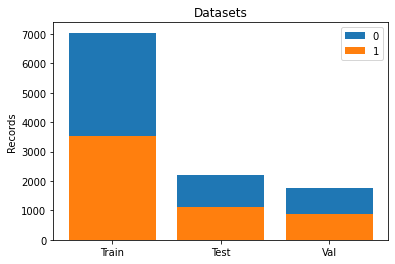

In [90]:
xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val = split_dataframe(
    dataset=vectorized_investments_dataframe,
    test_size=0.2,
    val_size=0.1
)

In [ ]:
investment_link_prediction, loss, accuracy = train_link_prediction(
    xn_train,
    xc_train,
    y_train,
    xn_test,
    xc_test,
    y_test,
    xn_val,
    xc_val,
    y_val,
    learning_rate=0.00001,
    epochs=15,
    batch_size=100,
    dropout=0.02,
)

Input: (7040, 13) (7040, 8, 96)
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 8, 96)]      0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________________________________________
flatten_14 (Flatten)            (None, 768)          0           input_30[0][0]                   
__________________________________________________________________________________________________
concatenate_14 (Concatenate)    (None, 781)          0           input_29[0][0]                   
                                                            

In [ ]:
error_analysis(
    model=investment_link_prediction,
    confidence=0.9,
    xn_test=xn_test,
    xc_test=xc_test,
    y_test=y_test,
)

In [ ]:
predictions: list = predict_link_model(
    model=investment_link_prediction, 
    confidence=0.99,
    records=[{
        'city#company': 'San Francisco',
        'state#company': 'California',
        'country#company': 'US',
        'industry#company': 'health',
        'employee_count#company': 100,
        'affiliations#company': 3000,
        'popularity_score#company': 0.9,
        'total_investmnets#company': 12,
        'valuation#company': 10000000,
        'average_investment_size#company': 10000,
        'city#person': 'San Francisco',
        'state#person': 'California',
        'country#person': 'US',
        'industry#person': 'health',
        'affiliations#person': 1000,
        'popularity_score#person': 0.4,
        'total_investmnets#person': 2,
        'average_investment_size#person': 2000,
        'introduction_path_length#relationship': 1,
        'introduction_path_score#relationship': 0.99,
        'mutual_connections#relationship': 300,
    }, {
        'city#company': 'San Francisco',
        'state#company': 'California',
        'country#company': 'US',
        'industry#company': 'health',
        'employee_count#company': 100,
        'affiliations#company': 3000,
        'popularity_score#company': 0.9,
        'total_investmnets#company': 2,
        'valuation#company': 10000,
        'average_investment_size#company': 50,
        'city#person': 'New York',
        'state#person': 'New York',
        'country#person': 'US',
        'industry#person': 'finance',
        'affiliations#person': 100,
        'popularity_score#person': 0.1,
        'total_investmnets#person': 2,
        'average_investment_size#person': 2000,
        'introduction_path_length#relationship': 6,
        'introduction_path_score#relationship': 0.04,
        'mutual_connections#relationship': 0,
    }],
)
assert predictions[0][0]
assert not predictions[1][0]

# Contact Prediction

In [ ]:
raw_contacts_dataframe: pd.DataFrame = generate_random_contacts_dataset(
    total=10000,
    connections=0.5,
    nulls=0.01,
    mutability=0.01,
    relevance=500,
    feedback=[
        {
            'city#1': 'San Francisco',
            'state#1': 'California',
            'country#1': 'US',
            'industry#1': 'health',
            'affiliations#1': 600,
            'popularity_score#1': 0.9,
            'total_investmnets#1': 10,
            'average_investment_size#1': 20000,
            'city#2': 'San Francisco',
            'state#2': 'California',
            'country#2': 'US',
            'industry#2': 'health',
            'affiliations#2': 1000,
            'popularity_score#2': 0.4,
            'total_investmnets#2': 2,
            'average_investment_size#2': 2000,
            'introduction_path_length#relationship': 2,
            'introduction_path_score#relationship': 0.95,
            'mutual_connections#relationship': 300,
            'connected': 1,
        },
        {
            'city#1': 'San Francisco',
            'state#1': 'California',
            'country#1': 'US',
            'industry#1': 'health',
            'affiliations#1': 30,
            'popularity_score#1': 0.01,
            'total_investmnets#1': 0,
            'average_investment_size#1': 0,
            'city#2': 'San Francisco',
            'state#2': 'California',
            'country#2': 'US',
            'industry#2': 'health',
            'affiliations#2': 1000,
            'popularity_score#2': 0.02,
            'total_investmnets#2': 2,
            'average_investment_size#2': 2000,
            'introduction_path_length#relationship': 6,
            'introduction_path_score#relationship': 0.04,
            'mutual_connections#relationship': 0,
            'connected': 0,
        },
    ],
)

In [ ]:
raw_contacts_dataframe.head()

In [ ]:
raw_contacts_dataframe: pd.DataFrame = fix_nulls(raw_contacts_dataframe)
raw_contacts_dataframe.head()

In [ ]:
vectorized_contacts_dataframe: pd.DataFrame = df2vec(raw_contacts_dataframe)

In [ ]:
vectorized_contacts_dataframe.head()

In [ ]:
xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val = split_dataframe(
    dataset=vectorized_contacts_dataframe,
    test_size=0.2,
    val_size=0.1
)

In [ ]:
contact_link_prediction, loss, accuracy = train_link_prediction(
    xn_train,
    xc_train,
    y_train,
    xn_test,
    xc_test,
    y_test,
    xn_val,
    xc_val,
    y_val,
    learning_rate=0.0001,
    epochs=15,
    batch_size=100,
    dropout=0.02,
)

In [ ]:
error_analysis(
    model=contact_link_prediction,
    confidence=0.9,
    xn_test=xn_test,
    xc_test=xc_test,
    y_test=y_test,
)

In [ ]:
predictions: list = predict_link_model(
    model=contact_link_prediction, 
    confidence=0.99,
    records=[{
        'city#1': 'San Francisco',
        'state#1': 'California',
        'country#1': 'US',
        'industry#1': 'health',
        'affiliations#1': 600,
        'popularity_score#1': 0.9,
        'total_investmnets#1': 10,
        'average_investment_size#1': 20000,
        'city#2': 'San Francisco',
        'state#2': 'California',
        'country#2': 'US',
        'industry#2': 'health',
        'affiliations#2': 1000,
        'popularity_score#2': 0.4,
        'total_investmnets#2': 2,
        'average_investment_size#2': 2000,
        'introduction_path_length#relationship': 2,
        'introduction_path_score#relationship': 0.95,
        'mutual_connections#relationship': 300,
    }, {
        'city#1': 'San Francisco',
        'state#1': 'California',
        'country#1': 'US',
        'industry#1': 'health',
        'affiliations#1': 30,
        'popularity_score#1': 0.01,
        'total_investmnets#1': 0,
        'average_investment_size#1': 0,
        'city#2': 'San Francisco',
        'state#2': 'California',
        'country#2': 'US',
        'industry#2': 'health',
        'affiliations#2': 1000,
        'popularity_score#2': 0.02,
        'total_investmnets#2': 2,
        'average_investment_size#2': 2000,
        'introduction_path_length#relationship': 6,
        'introduction_path_score#relationship': 0.04,
        'mutual_connections#relationship': 0,
    }],
)
assert predictions[0][0]
assert not predictions[1][0]